## ***Australia Rain Prediction***




In [133]:

from google .colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [135]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/weatherAUS.csv")

In [136]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [137]:
df.isnull().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [138]:
df["Location"].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [139]:
df["Location"].duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
145455     True
145456     True
145457     True
145458     True
145459     True
Name: Location, Length: 145460, dtype: bool

In [140]:
n_cols=df.select_dtypes(include=['int','float']).columns
n_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [141]:
c_cols=df.select_dtypes(include=['object']).columns
c_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [142]:
for i in c_cols:
    print(i, df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [143]:
for i in c_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [144]:
for i in n_cols:
    print(i, df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609


In [145]:
for i in n_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [146]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

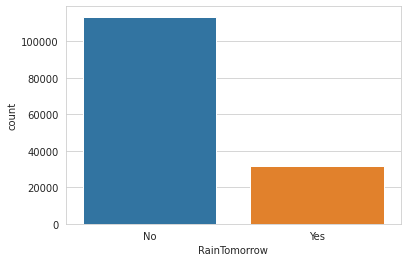

In [148]:
sns.countplot(df.RainTomorrow)

In [149]:
#Dataset is imbalanced

# What is the Relationship between Windspeed vs Humididty ?

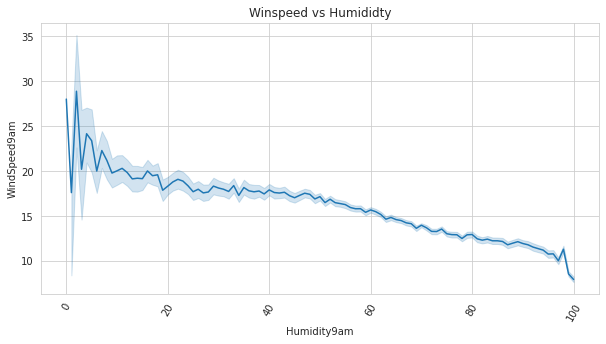

In [152]:
sns.set_style(style="whitegrid")
fig_dims= (10,5)
fig, ax=plt.subplots(figsize = fig_dims)
fig=sns.lineplot(y=df["WindSpeed9am"],x=df["Humidity9am"],ax=ax).set(title="Winspeed vs Humididty")
plt.xticks(rotation=60)
plt.show()

# Windspeed is inversely proportional to as Humidity increases windspeed decreases

# What is the Relationship between Windspeed and Pressure ?

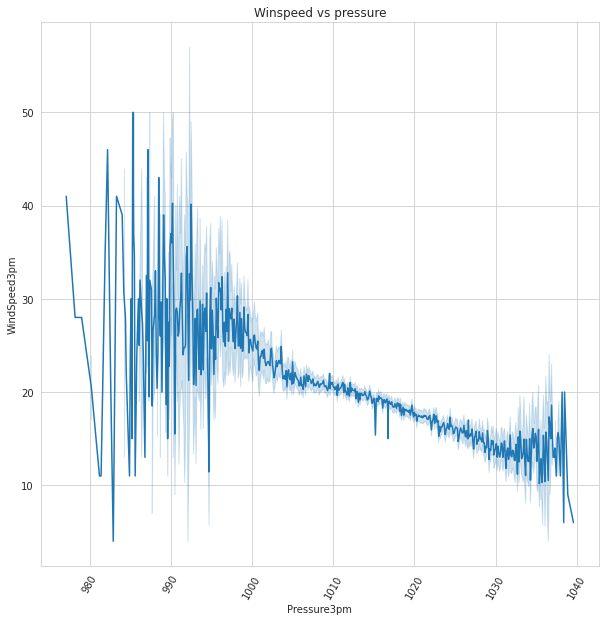

In [153]:
fig_dims= (10,10)
fig, ax=plt.subplots(figsize = fig_dims)
fig=sns.lineplot(x=df["Pressure3pm"],y=df["WindSpeed3pm"],ax=ax).set(title="Winspeed vs pressure")
plt.xticks(rotation=60)
plt.show()

# Windspeed is inversely proportional to pressure. As prerssure increases windspeed decreases.
# windspeed is maximum when pressure is between in 990-1000



# What is relationship between cloud and temperature ?

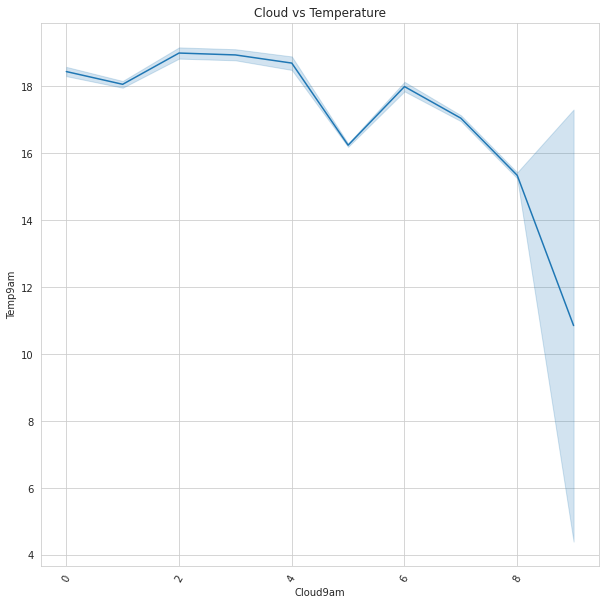

In [154]:
fig_dims= (10,10)
fig, ax=plt.subplots(figsize = fig_dims)
fig=sns.lineplot(x=df["Cloud9am"],y=df["Temp9am"],ax=ax).set(title="Cloud vs Temperature")
plt.xticks(rotation=60)
plt.show()

# As no. of clouds increases in sky Temperature decreases 

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in c_cols:
    df[i] = label_encoder.fit_transform(df[i])

In [156]:
X=df.drop(["RainTomorrow","Date"],axis=1)
y=df["RainTomorrow"]          

In [157]:
col_names = list(X.columns)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X= pd.DataFrame(X, columns=col_names)


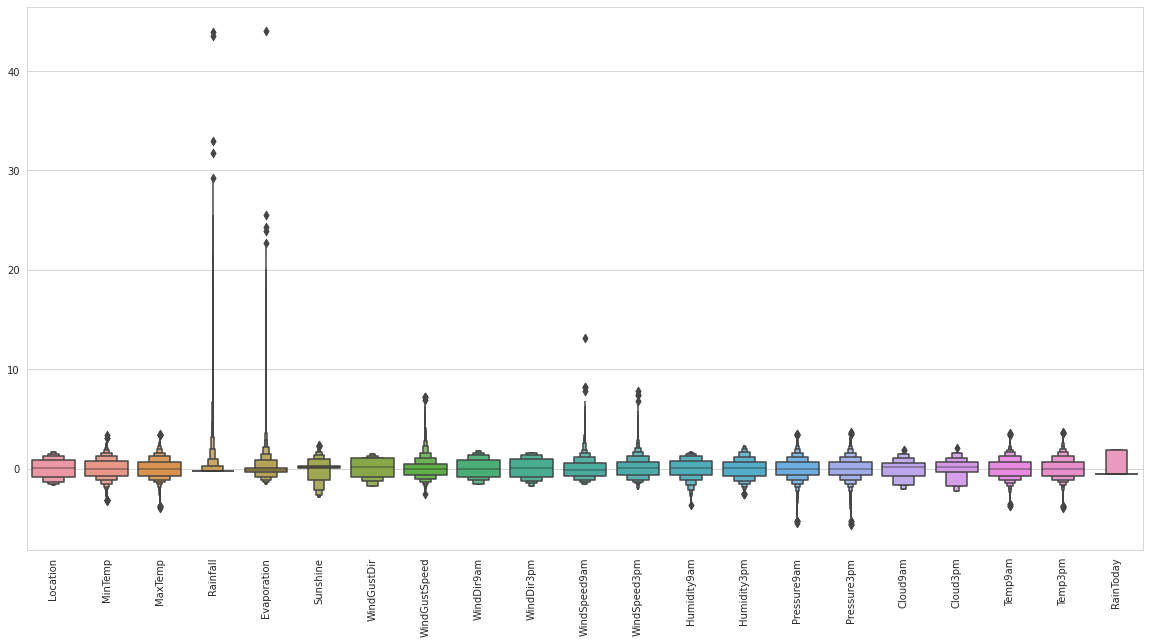

In [158]:
plt.figure(figsize=(20,10))
sns.boxenplot(data =X)
plt.xticks(rotation=90)
plt.show()

In [159]:
X["RainTommorow"]=y

# Removing Outliers 

In [160]:
X = X[(X["MinTemp"]<2.3)&(X["MinTemp"]>-2.3)]
X = X[(X["MaxTemp"]<2.3)&(X["MaxTemp"]>-2)]
X = X[(X["Rainfall"]<4.5)]
X = X[(X["Evaporation"]<2.8)]
X = X[(X["Sunshine"]<2.1)]
X = X[(X["WindGustSpeed"]<4)&(X["WindGustSpeed"]>-4)]
X = X[(X["WindSpeed9am"]<4)]
X = X[(X["WindSpeed3pm"]<2.5)]
X = X[(X["Humidity9am"]>-3)]
X = X[(X["Humidity3pm"]>-2.2)]
X = X[(X["Pressure9am"]< 2)&(X["Pressure9am"]>-2.7)]
X = X[(X["Pressure3pm"]< 2)&(X["Pressure3pm"]>-2.7)]
X = X[(X["Cloud9am"]<1.8)]
X = X[(X["Cloud3pm"]<2)]
X = X[(X["Temp9am"]<2.3)&(X["Temp9am"]>-2)]
X = X[(X["Temp3pm"]<2.3)&(X["Temp3pm"]>-2)]
X.shape

(127536, 22)

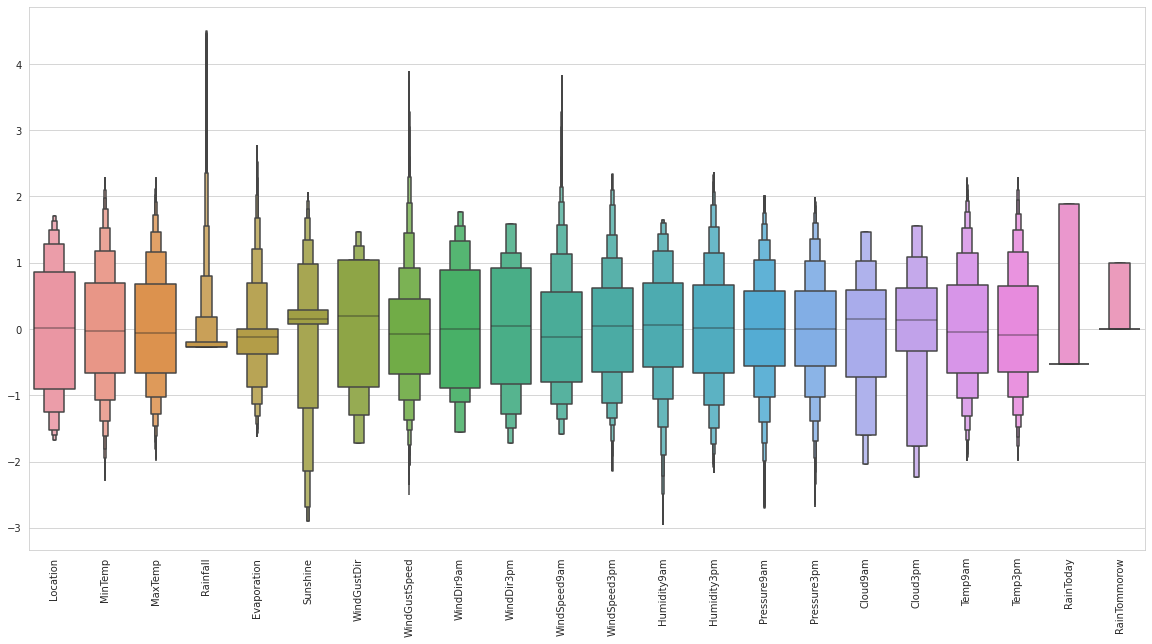

In [161]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=90)
plt.show()

#  MODEL BUILDING 


In [162]:
x=X.drop(["RainTommorow"],axis=1)
y=X["RainTommorow"]

In [163]:
#from imblearn.over_sampling import SMOTE
#sm=SMOTE(sampling_strategy="auto")
#X,y=sm.fit_resample(x,y)

In [164]:
from sklearn.model_selection import train_test_split 

In [165]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1) 

In [166]:
X_train.shape

(89275, 21)

In [167]:
X_test.shape

(38261, 21)

In [168]:
y_train.shape

(89275,)

In [169]:
y_test.shape

(38261,)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix


In [174]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report 
from tensorflow.keras.callbacks import EarlyStopping

In [175]:
ann=Sequential()

In [176]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=2,patience=30)

In [177]:
ann.add(Dense(units=32,activation="relu")) 
ann.add(Dense(units=32,activation="relu")) 
ann.add(Dense(units=16,activation="relu"))
ann.add(Dense(units=8,activation="relu")) 
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stop], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 10s 3ms/step - loss: 0.3728 - accuracy: 0.8375 - val_loss: 0.3584 - val_accuracy: 0.8454
Epoch 2/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.3566 - accuracy: 0.8463 - val_loss: 0.3530 - val_accuracy: 0.8489
Epoch 3/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3521 - accuracy: 0.8484 - val_loss: 0.3468 - val_accuracy: 0.8506
Epoch 4/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.3494 - accuracy: 0.8501 - val_loss: 0.3458 - val_accuracy: 0.8509
Epoch 5/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3468 - accuracy: 0.8509 - val_loss: 0.3427 - val_accuracy: 0.8509
Epoch 6/150
2232/2232 [==============================] - 9s 4ms/step - loss: 0.3447 - accuracy: 0.8519 - val_loss: 0.3406 - val_accuracy: 0.8514
Epoch 7/150
2232/2232 [==============================] - 7s 3ms/step - loss: 0.3433 - accuracy: 0.8524 - val_loss: 0.3423 - val_a

In [178]:
history.history

{'loss': [0.37275123596191406,
  0.3566243648529053,
  0.3521355390548706,
  0.3493831753730774,
  0.3468388617038727,
  0.34471046924591064,
  0.3433418571949005,
  0.3418823182582855,
  0.340530127286911,
  0.33932581543922424,
  0.33782142400741577,
  0.3372398614883423,
  0.3361673653125763,
  0.3354804515838623,
  0.3346429169178009,
  0.33389952778816223,
  0.3330363631248474,
  0.3326956629753113,
  0.3315477669239044,
  0.33116617798805237,
  0.3305828273296356,
  0.33002063632011414,
  0.32943233847618103,
  0.3286590874195099,
  0.3285689055919647,
  0.3279588520526886,
  0.32745450735092163,
  0.3269427716732025,
  0.3260596990585327,
  0.3255085051059723,
  0.325732558965683,
  0.32463714480400085,
  0.32451653480529785,
  0.3242626190185547,
  0.3234972059726715,
  0.32319751381874084,
  0.3227898180484772,
  0.32247382402420044,
  0.3219861388206482,
  0.32204124331474304,
  0.3209042549133301,
  0.32099488377571106,
  0.3204740881919861],
 'accuracy': [0.8375244736671448

In [179]:
loss_df=pd.DataFrame(history.history)
loss_df


,loss,accuracy,val_loss,val_accuracy
0,0.372751,0.837524,0.358409,0.845365
1,0.356624,0.846262,0.352955,0.848894
2,0.352136,0.848390,0.346836,0.850574
3,0.349383,0.850070,0.345848,0.850910
4,0.346839,0.850924,0.342747,0.850854
5,0.344710,0.851862,0.340643,0.851414
6,0.343342,0.852408,0.342309,0.852198
7,0.341882,0.852660,0.341277,0.851974
8,0.340530,0.854313,0.342880,0.853934
9,0.339326,0.853654,0.340369,0.851918


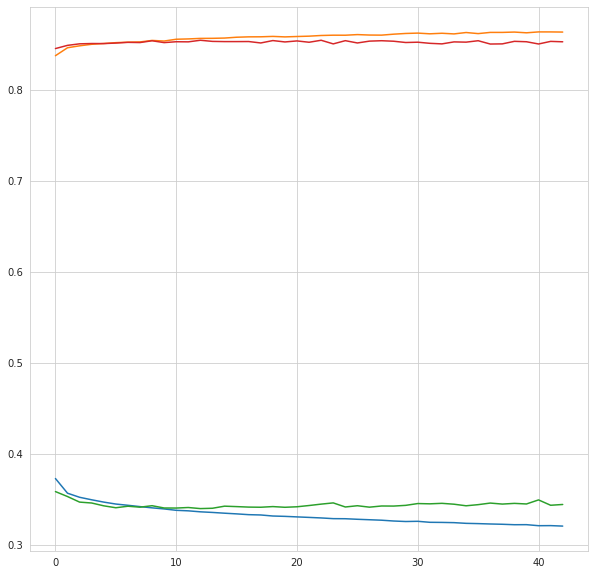

In [180]:
plt.figure(figsize=(10,10))
plt.plot(loss_df)

In [181]:
y_pred=ann.predict(X_test)

1196/1196 [==============================] - 3s 3ms/step


In [182]:
y_pred

array([[0.006885  ],
       [0.00321977],
       [0.0277841 ],
       ...,
       [0.04037146],
       [0.9268776 ],
       [0.04159674]], dtype=float32)

In [183]:
y_pred=np.where(y_pred<0.5,0,1)

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     30065
           1       0.71      0.50      0.59      8196

    accuracy                           0.85     38261
   macro avg       0.79      0.72      0.75     38261
weighted avg       0.84      0.85      0.84     38261



<AxesSubplot:>

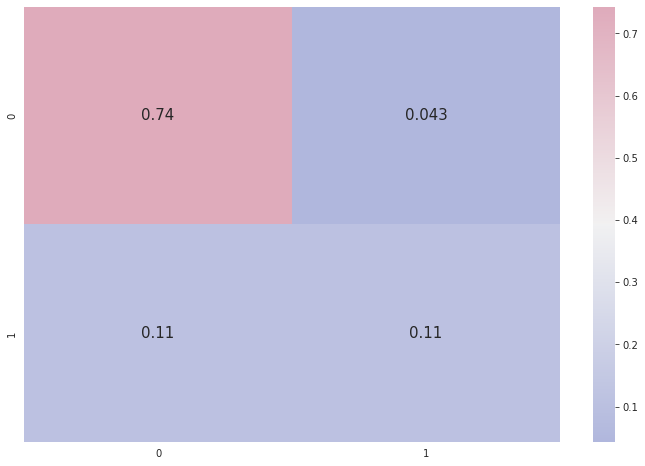

In [185]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

# This shows that Model has Good True positive Rate


---



---

